In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# river height data from 2/23/22 - 2/23/23
df = pd.read_csv("CSVs/temp_rain_river_height_nooksack.csv", parse_dates = [5])
df.set_index('Date_Time')
df
#df_samp = df.resample('4T').ffill();

,Date,Time,Height,Rain,Temp,Date_Time
0,10/27/2022,0:00,3.94,0.0,47.4,2022-10-27 00:00:00
1,10/27/2022,0:15,3.93,0.0,47.5,2022-10-27 00:15:00
2,10/27/2022,0:30,3.92,0.0,47.6,2022-10-27 00:30:00
3,10/27/2022,0:45,3.92,0.0,47.3,2022-10-27 00:45:00
4,10/27/2022,1:00,3.91,0.0,47.4,2022-10-27 01:00:00
...,...,...,...,...,...,...
9730,2/23/2023,12:30,5.75,0.0,30.6,2023-02-23 12:30:00
9731,2/23/2023,12:45,5.75,0.0,31.7,2023-02-23 12:45:00
9732,2/23/2023,13:00,5.74,0.0,31.8,2023-02-23 13:00:00
9733,2/23/2023,13:15,5.73,0.0,33.7,2023-02-23 13:15:00


<AxesSubplot: xlabel='Date_Time'>

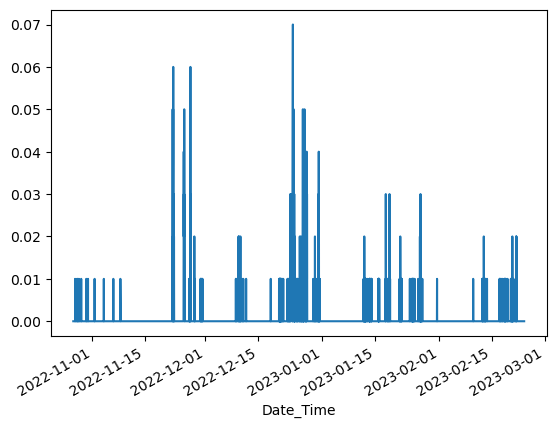

In [3]:
rain_data = df.iloc[:,3].tolist()
rainfall = pd.Series(rain_data, index = df.Date_Time)
#rainfall.index = pd.to_datetime(rainfall.index, unit='s')
rainfall.plot()

<AxesSubplot: xlabel='Date_Time'>

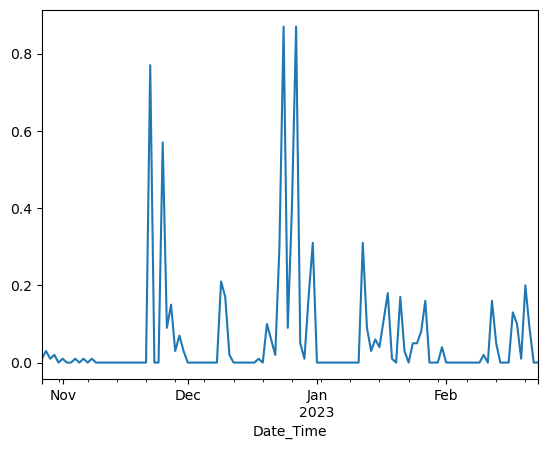

In [14]:
rain_resamp = rainfall.resample('1D').sum() # downsample rainfall to x amount of days
rain_resamp.plot()

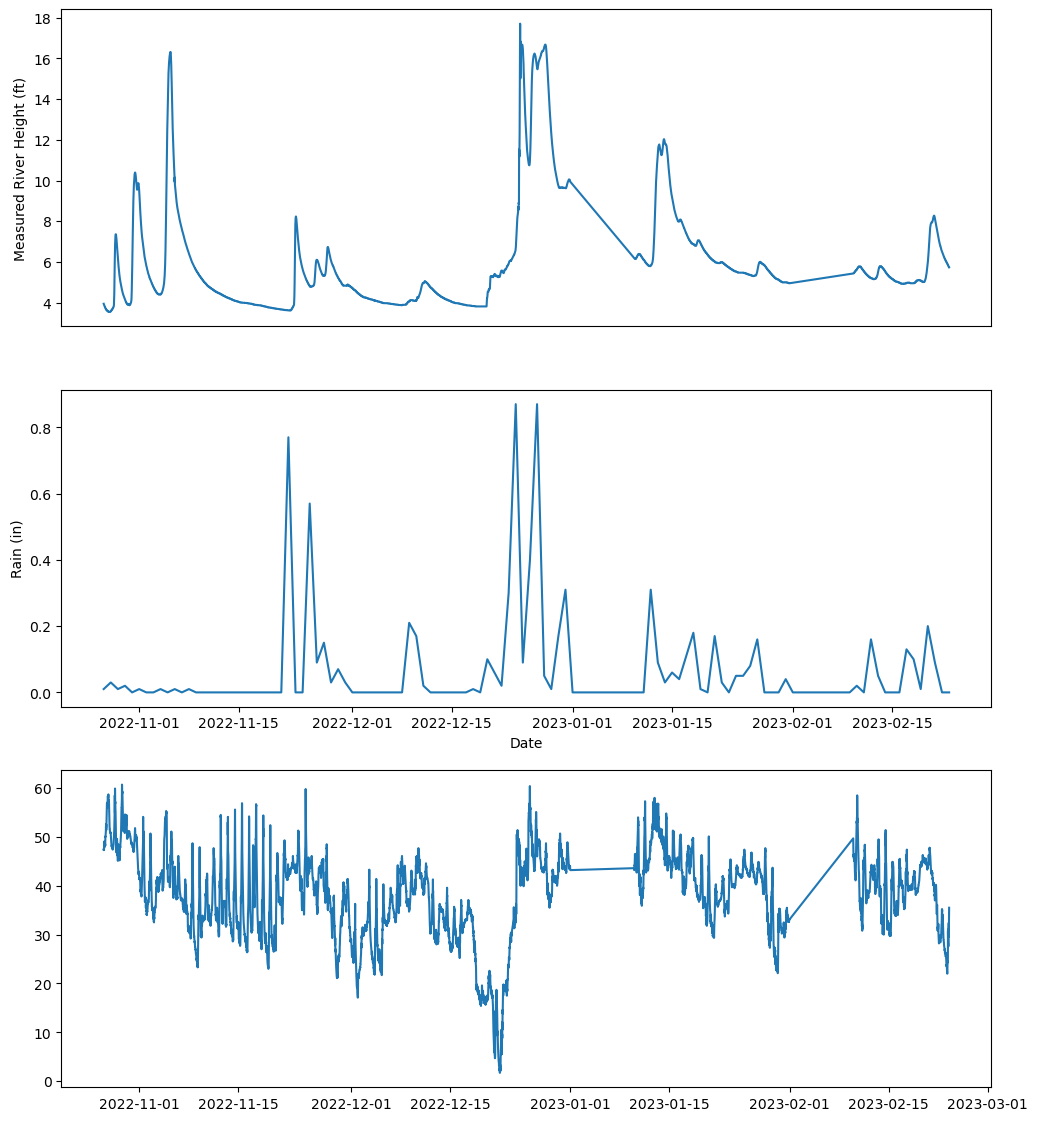

In [15]:
fig, axes = plt.subplots(figsize = (12,14),  nrows = 3)
ax0, ax1, ax2 = axes
axes[0].plot(df.Date_Time, df.Height)
axes[0].set_ylabel('Measured River Height (ft)')
axes[0].set_xticks([])


axes[1].plot(rain_resamp)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('DailRain (in)')
#axes[1].set_xticks([])

axes[2].plot(df.Date_Time, df.Temp)
#plt.xticks(np.arange(0, len(df.Date_Time), 2688), rotation = 45)


# Now just River Height:

In [6]:
df_0 = pd.read_csv("CSVs/RiverHeight_15_Years.csv", parse_dates = [4])
df_0

,Column3,Column4,Height,Column1,Date_Time
0,3/4/2008,12:00:00 AM,5.59,0,2008-03-04 00:00:00
1,3/4/2008,12:15:00 AM,5.59,15,2008-03-04 00:15:00
2,3/4/2008,12:30:00 AM,5.59,30,2008-03-04 00:30:00
3,3/4/2008,12:45:00 AM,5.59,45,2008-03-04 00:45:00
4,3/4/2008,1:00:00 AM,5.59,100,2008-03-04 01:00:00
...,...,...,...,...,...
522956,3/4/2023,3:30:00 PM,4.71,1530,2023-03-04 15:30:00
522957,3/4/2023,3:45:00 PM,4.70,1545,2023-03-04 15:45:00
522958,3/4/2023,4:00:00 PM,4.70,1600,2023-03-04 16:00:00
522959,3/4/2023,4:15:00 PM,4.70,1615,2023-03-04 16:15:00


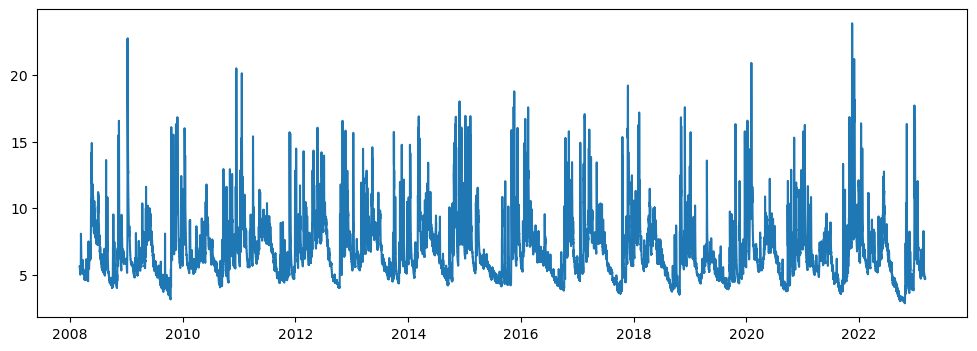

In [7]:
fig, axes = plt.subplots(figsize = (12,4))
axes.plot(df_0.Date_Time, df_0.Height)

In [8]:
height_data = df_0.iloc[:,2].tolist()
river_height = pd.Series(height_data, index = df_0.Date_Time)

In [9]:
#freq = np.fft.fftfreq(samples,t)
freq_spec = np.fft.fft(river_height.values) #fourier transform
N = river_height.shape[0]
n = np.arange(N)
print(N)

522961


In [10]:
t = 15 #period between samples in minutes

#sample rate
sr = 1/t

# Total duration of dataset in minutes
T = N * t

# Array of frequencies
freq = np.fft.fftfreq(N,t)
freq.shape

(522961,)

In [11]:
print(max(freq))
print(sr/2)

0.03333326959371732
0.03333333333333333


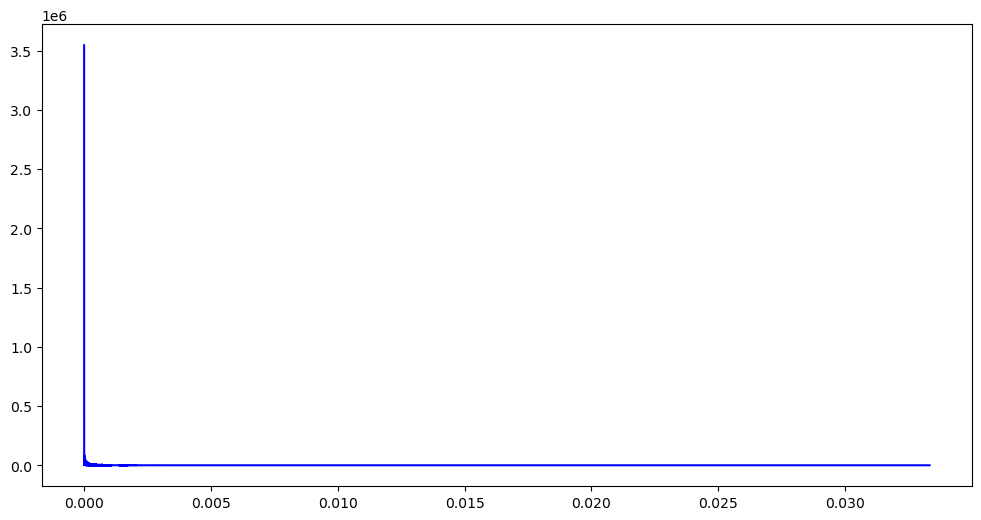

In [12]:
# Get one-sided sprectrum 
n_oneside = N//2

# Get one side frequency and amplitude spectrum
f_oneside = freq[:n_oneside] #one side frequency
f_spec_oneside = np.abs(freq_spec[:n_oneside]) # #amplitude spectrum

plt.figure(figsize = (12,6))
plt.plot(f_oneside, f_spec_oneside, 'b')

Text(0, 0.5, 'FFT Amplitude')

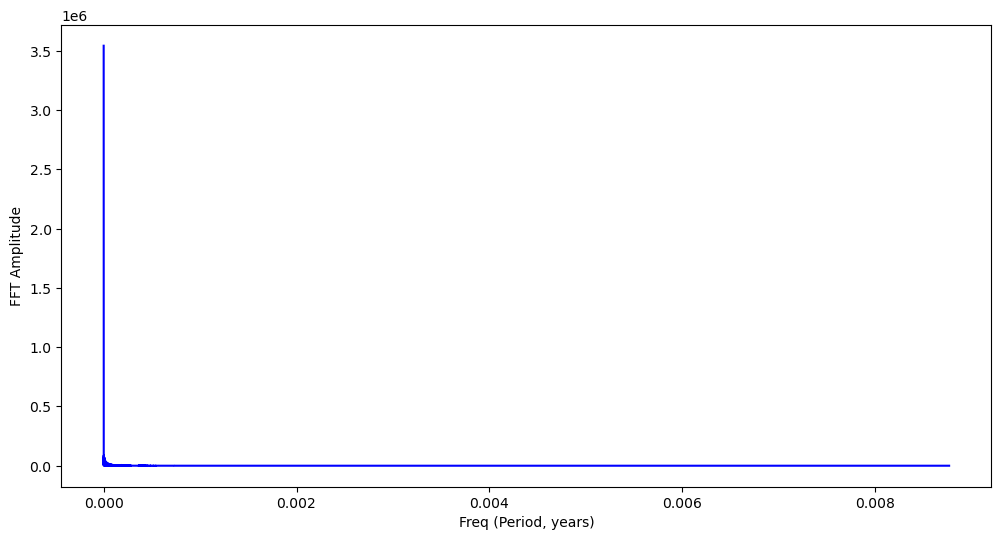

In [13]:
plt.figure(figsize = (12,6))
plt.plot((f_oneside * 96) / 365, f_spec_oneside, 'b') #convert to years (96 samples a day * 30.41 days/month * 365 days in a year) = 1065800
plt.xlabel('Freq (Period, years)')
plt.ylabel('FFT Amplitude')